# Homework Set - II

Each Question/subquestion is worth **2 points**, unless indicated otherwise.

### Reproducibility

In the following section, imagine you are working on a gene expression dataset. You want to do some analysis with this dataset and publish a paper. To make sure someone else can reproduce your analysis and results, you want to generate a report with the code and the output results. You will do so using a jupyter notebook, using R. 

You will be doing a basic analysis of the `genes.table` dataset.

**Q1.** **[4 points]** First, created a new notebook analogous to what you did in Module 12.

- create it in your HW2 folder, name this `my_hw2_notebook`, and set the kernel to R
- Add a new section called "Homework", and include an appropriate header describing what is contained in this notebook. 
- Add your code and answers to the questions below to the Homework section. 
- Make sure the kernel is set to R (System-wide).

**Q2.** **[3 points]** Create new cells which contain R code "chunks" that perform the following tasks:

- First, read in the `genes.table` file and stored into a variable. 
- Use the `head()` function to print out the first few rows of the table and check if you correctly load the table.
- What are the columns? Write your answer in a markdown cell in your new notebook.

In [3]:
# Load the genes.table file into a variable with enhanced error handling
genes_data <- read.table("genes.table", header = TRUE, sep = "\t", fill = TRUE)

# Print the first few rows of the table using head()
head(genes_data)

# Create a markdown cell to describe the columns
the_columns <- colnames(genes_data)
cat("The columns in the genes.table are:")
cat(paste0("\n- ", the_columns, collapse = ""))



,geneA.geneB.geneC.geneD,X
,<chr>,<lgl>
1,0.0296366100597777 -0.155897744729822 0.777117756428197 0.93888224579024,NA
2,-0.559140191029743 0.857408217899044 0.954383868491277 2.1267176357031,NA
3,-0.067523485126175 -0.890625198074956 0.98413971439004 1.85739404989292,NA
4,-0.285218112603666 0.65227021287505 0.00221116561442614 1.86939427669382,NA
5,-1.23289415606197 0.0863166052952267 0.33585471031256 0.750987125589182,NA
6,-0.196549322669711 0.0349378251421061 0.0523636580910534 3.68738296200279,NA


The columns in the genes.table are:
- geneA.geneB.geneC.geneD
- X

The columns in the genes.table are:
- geneA.geneB.geneC.geneD
- X

**Q3.** **[3 points]** Next,

- Using the `hist()` function, create a new cell and write code to plot the distribution of abundance for each gene. 
- Outside the code chunk, use comments to interpret what you observe from these plots. For example: do they look normally distributed?) 
- If you wanted to test for differences in expression between genes, which tests would you use for which comparisons? Why? (Hint: What does the t-test assume? What is an alternative to a t-test?). Write your answers in a markdown cell in your new notebook.

 num [1:500, 1:4] 0.0296 -0.5591 -0.0675 -0.2852 -1.2329 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:4] "X1" "X2" "X3" "X4"


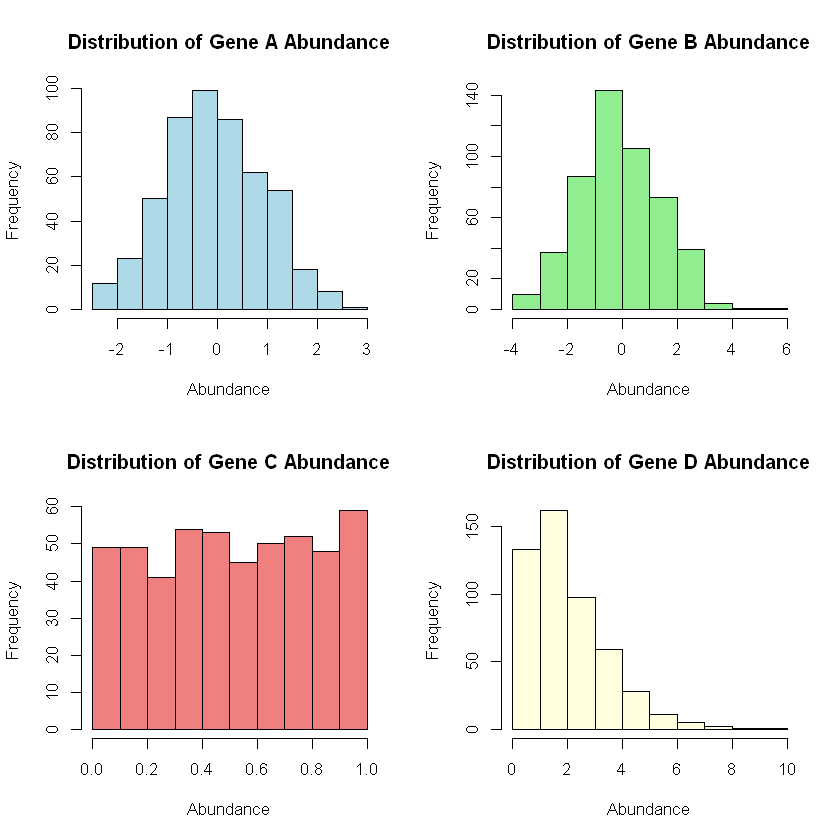

In [24]:
# Split the 'geneA.geneB.geneC.geneD' column into separate gene columns
genes_data_split <- data.frame(do.call('rbind', strsplit(as.character(genes_data$geneA.geneB.geneC.geneD), ' ')))

# Convert the split gene columns to numeric
genes_data_split <- apply(genes_data_split, 2, function(x) as.numeric(as.character(x)))

# Check the structure of the new data frame
str(genes_data_split)

# Assign column names (geneA, geneB, geneC, geneD)
colnames(genes_data_split) <- c("geneA", "geneB", "geneC", "geneD")

# Plot histograms for each gene's abundance
par(mfrow = c(2, 2))  # Set up a 2x2 plotting grid
hist(genes_data_split[, "geneA"], main = "Distribution of Gene A Abundance", xlab = "Abundance", col = "lightblue")
hist(genes_data_split[, "geneB"], main = "Distribution of Gene B Abundance", xlab = "Abundance", col = "lightgreen")
hist(genes_data_split[, "geneC"], main = "Distribution of Gene C Abundance", xlab = "Abundance", col = "lightcoral")
hist(genes_data_split[, "geneD"], main = "Distribution of Gene D Abundance", xlab = "Abundance", col = "lightyellow")

# Reset plot layout
par(mfrow = c(1, 1))


To test for differences in expression between genes, the choice of statistical test depends on the distribution of the data and whether the assumptions for certain tests are met.

1. t-test (Two-sample t-test):
The t-test is used to compare the means between two groups. However, it assumes that:
The data are normally distributed (bell-shaped).
The variances between groups are equal (homogeneity of variances).
The samples are independent.
From the histograms:

Gene A and Gene B distributions appear approximately normal, which makes them good candidates for a t-test.
If we were to compare the mean expression of Gene A and Gene B, a t-test might be appropriate provided we also check for equal variances using an F-test or Levene’s test.
2. Non-parametric test (Mann-Whitney U test / Wilcoxon rank-sum test):
If the data are not normally distributed, such as in the case of Gene C (which has a uniform-like distribution) and Gene D (which is heavily skewed), a non-parametric test like the Mann-Whitney U test (also called the Wilcoxon rank-sum test) is more appropriate.
Non-parametric tests do not assume normality and instead compare the ranks of the data, which makes them suitable for skewed or non-normal distributions like Gene D.
3. ANOVA (Analysis of Variance):
If we want to compare the means of more than two groups (e.g., comparing all four genes), ANOVA can be used, provided the normality and equal variance assumptions are met.
For non-normal distributions like Gene C and Gene D, a Kruskal-Wallis test (a non-parametric version of ANOVA) would be a better option, as it does not assume normality.
Conclusion:
For genes that are normally distributed (such as Gene A and Gene B), a t-test or ANOVA could be used to compare their means.
For genes that are not normally distributed (such as Gene C and Gene D), a Mann-Whitney U test or Kruskal-Wallis test would be more appropriate to compare their medians.

The genes all look normally distributed, so we can use a t test for comparisons. If they were not normally distributed, we could use a wilcoxon ranked sum test

**Q4.** **[4 points]** Now, create a new cell in your notebook and use the approprite statistical test to compare the expression patterns of the following pairs:

**a. geneA vs geneB**

**b. geneA vs geneC**

**c. geneB vs geneC**

**d. geneB vs geneD**

(Hint: In R, the functions `t.test()` and `wilcox.test()` may be useful to you.)

Outside the code chunks, write down what statistical test you use in the analysis and what results you get. 

Write your answers in a markdown cell in your new notebook.

In [25]:
# a. geneA vs geneB (Assuming normal distributions based on histograms)
t_test_ab <- t.test(genes_data_split[, "geneA"], genes_data_split[, "geneB"])
t_test_ab

# b. geneA vs geneC (Gene C is not normally distributed, so using non-parametric test)
wilcox_test_ac <- wilcox.test(genes_data_split[, "geneA"], genes_data_split[, "geneC"])
wilcox_test_ac

# c. geneB vs geneC (Gene C is not normally distributed, so using non-parametric test)
wilcox_test_bc <- wilcox.test(genes_data_split[, "geneB"], genes_data_split[, "geneC"])
wilcox_test_bc

# d. geneB vs geneD (Gene D is skewed, so using non-parametric test)
wilcox_test_bd <- wilcox.test(genes_data_split[, "geneB"], genes_data_split[, "geneD"])
wilcox_test_bd



	Welch Two Sample t-test

data:  genes_data_split[, "geneA"] and genes_data_split[, "geneB"]
t = 0.20203, df = 876.75, p-value = 0.8399
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1386207  0.1704329
sample estimates:
  mean of x   mean of y 
-0.06278609 -0.07869219 



	Wilcoxon rank sum test with continuity correction

data:  genes_data_split[, "geneA"] and genes_data_split[, "geneC"]
W = 73274, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  genes_data_split[, "geneB"] and genes_data_split[, "geneC"]
W = 85865, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  genes_data_split[, "geneB"] and genes_data_split[, "geneD"]
W = 36393, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


a. geneA vs geneB (Welch Two Sample t-test):
I used a Welch Two Sample t-test since both geneA and geneB appear to be normally distributed.
Results: The p-value is 0.8399, which is much greater than 0.05. This indicates that we fail to reject the null hypothesis, meaning there is no significant difference in the mean expression levels between geneA and geneB. The 95% confidence interval also contains 0 (-0.1386 to 0.1704), supporting the conclusion that the means are similar.

b. geneA vs geneC (Wilcoxon rank-sum test):
I used a Wilcoxon rank-sum test because geneC is not normally distributed.
Results: The p-value is < 2.2e-16, which is extremely small. This means we reject the null hypothesis and conclude that there is a significant difference in the median expression levels between geneA and geneC.

c. geneB vs geneC (Wilcoxon rank-sum test):
A Wilcoxon rank-sum test was also used here, as geneC is not normally distributed.
Results: The p-value is < 2.2e-16, again indicating that we reject the null hypothesis and conclude that there is a significant difference in the median expression levels between geneB and geneC.

d. geneB vs geneD (Wilcoxon rank-sum test):
I used a Wilcoxon rank-sum test for this comparison since geneD is skewed.
Results: The p-value is < 2.2e-16, which is very small, meaning we reject the null hypothesis. This suggests a significant difference in the median expression levels between geneB and geneD.

Summary:
There is no significant difference between the mean expression levels of geneA and geneB (p-value = 0.8399).
There are significant differences in the median expression levels between geneA and geneC, geneB and geneC, and geneB and geneD (all with p-values < 2.2e-16).

**Q5.** **[2 points]** Finally:

- Create a new cell, call the `sessionInfo()` command. 

This command gives you a snapshot of the versions of libraries and various tools that you have installed (and run). 
Useful for reproducibility!

In [26]:
# Display session information
sessionInfo()


R version 4.4.1 (2024-06-14 ucrt)
Platform: x86_64-w64-mingw32/x64
Running under: Windows 10 x64 (build 19045)

Matrix products: default


locale:
[1] LC_COLLATE=English_United States.utf8 
[2] LC_CTYPE=English_United States.utf8   
[3] LC_MONETARY=English_United States.utf8
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.utf8    

time zone: America/New_York
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] digest_0.6.37     IRdisplay_1.1     utf8_1.2.4        base64enc_0.1-3  
 [5] fastmap_1.2.0     glue_1.7.0        htmltools_0.5.8.1 repr_1.1.7       
 [9] lifecycle_1.0.4   cli_3.6.3         fansi_1.0.6       vctrs_0.6.5      
[13] pbdZMQ_0.3-12     compiler_4.4.1    tools_4.4.1       evaluate_0.24.0  
[17] pillar_1.9.0      crayon_1.5.3      rlang_1.1.4       jsonlite_1.8.8   
[21] IRkernel_1.3.2    uuid_1.2-1       

**Q6.** **[2 points]** Now:

- Make sure you hit the save button on your jupyter notebook!
- Download your ipython notebook file as an html file. To accomplish this, go to the "File" menu and select "Download as", and select HTML.
- Copy the HTML back to your homework project directory.

Try downloading this onto your own computer! Open in up in a web browser. As you can see, it looks very similar to the code in the jupyter notebook, except that you can not edit it.

.html files can be opened by any web browser. Therefore, this html file can be useful for sharing your results with anyone who does not have jupyter installed on their computer. You can also download jupyter notebooks as .pdf files if you have jupyter installed on your own computer. However, the pdf convertor does not always work on CoCalc.

### Working in the UNIX environment

In the below questions, write the UNIX command that you used to accomplish the task.

**Q7a.** **[2 points]** Move to the directory called `assignment_move_here`

**Q7b.** **[2 points]** Now list the files in this directory:

**Q7c.** **[2 points]** See how there are several Pokémon-related files here, and a directory called `output/`. 

- Do a listing of this directory to see what is in that directory (if anything).

**Q8.** **[2 points]** So we see that nothing is in the output directory, and so our job will be to fill this in ourselves! First, let's get a sense of what the data looks like. The main file is `orig_151_pokemon.txt`, so write a command to take a look at that file 

**Q9.** **[3 points]** Now, write a command to 
- extract the main type (type 1)
- remove the header line
- sort the types
- count the number of Pokemon with each unique type (remember you can use the man pages if you forget a certain flag). 
- sort the types in descending order in terms of number of each type
- Finally, send the output of this command to a file called `output/type1_counts.txt`

**Q10.** **[2 points]** Write a command to print this file.

**Q11.** **[2 points]** What's the most second common *main* type for a Pokemon to have? How many Pokemon have this main type?

The second most common main type for a Pokémon is Normal, and there are 22 Pokémon with this main type.

**Q12.** **[3 points]** Now write a similar command for the secondary types (type 2 of each Pokemon), and send it to `output/type2_counts.txt`.

**Q13.** **[2 points]** How many Pokemon have no secondary type (denoted by 'None' in the type2 column)? 

According to the output, 84 Pokémon have no secondary type, as indicated by 'None' in the type2 column.


**Q14.** **[2 points]** What secondary type has the same number of Pokemon as the Psychic Secondary type?

The secondary type that has the same number of Pokémon as the Psychic secondary type (which has 6 Pokémon) is Ground, as both types have 6 Pokémon with that secondary type.

**Q15.** **[3 points]** Now, let's look at combinations of types. Write a command to 
- extract both type fields from the file
- remove the header line
- remove Pokemon without a secondary type (i.e. without 'None' as it's secondary type)
- sort the extracted combinations
- count how many times each unique combination of types appears
- and send this to output/combo_type_counts.txt
- sort the counts in descending order
(hint: you may need to review the manual for grep to accomplish this task)

**Q16.** **[2 points]** What's the 3rd most common combination of types, where there actually is a secondary type (so ignore entries with 'None' in the second column)? What many Pokemon are of this combination of types?

The 3rd most common combination of types, where there is a secondary type (ignoring 'None'), is Bug Poison, with 5 Pokémon having this combination.

For the next part of this assignment, we are going to get some more practice with `grep` and file compression. For this, we will be using a data set from the city of Philadelphia about historic streets. This data set is located at:

http://data.phl.opendata.arcgis.com/datasets/9409bce14c4e4768a11a8432e80bfa68_0.csv

**Q17.** **[3 points]** Move back into the main directory for this homework, make a folder called `homework_data/`, and move into it.

**Q18.** **[4 points]** Use wget with the `-O` flag, or with curl using the `-L` flag and output redirection to download this file into the current directory (homework_data) and name it `historic_streets.csv`.

Print the first 10 lines of this file to see what it looks like.

Notice how this is a comma separated file, containing information about historic streets in Philadelphia. Each row contains information about a given street such as the street name, where it comes from, and where it goes. 

**Q19.** **[4 points]** Give a command to 
- cut out the 5th column of this file (remember that you need to specify that it is comma-delimited)
- count how many different, unique streets there are in this column (remember you can pipe results to the wc command to get the number of lines)

*Hint: Check to see if the file has a header. If so, don't forget to account for this extra line.* 

**Q20.** **[4 points]** Now give a command to count how many times each street appears in the 5th column. How many streets are displayed 8 times in the dataset?

The three streets with 8 occurrences in the dataset are: E Erie Ave, Wood St, Cypress St

**Q21.** **[2 points]** Now use `grep` to find all the entries that contain 'ERIE AVE', either west or east.

**Q22.** **[4 points]** Let's look at the very last column, which describes what kind of road each entry is. Give a command to 

- cut out this column (which is the 16th column)
- find all the unique classes
- and count how many entries there are for each class
- sort by counts in **ASCENDING** order

**Q23.** **[2 points]** Next,

- extract all the entries that have Red Brick in this column (including the "Red Brick (Molded)" entries) with `grep`
- write this to a file called `red_brick_houses.txt`
- compress this into a .tar.gz file called `red_brick_houses.tar.gz`

Note that you can search the whole entry for Red Brick, not just specifically the last column (i.e. you don't need to use a cut command first).

### Analyzing ChIP-seq Resullts

In the following section we ask questions related to the ChIP-seq analysis modules. All the data needed to answer these questions are included in the `chip-seq_data` folder.

**Q24.** **[2 points]** From the folder from where you ended the last section, give and run the commands to navigate into the `chip-seq_data` folder and identify how many peaks we have in the file of p53 peaks under DMSO treatment which we used in the first ChIP-Seq module.

In [6]:
# write code below: 

**Q25.** **[2 points]** Next, give a command to:
1. Pull out the first column of the bed file
2. Sort it
3. Display how many peaks there are on each chromosome.
4. Sort it in descending order

In [0]:
# write code below:

**Q26.** **[2 points]** Next, upload this file to the UCSC genome browser (you can use the same uploading approach as the bedGraph file). Then, navigate to the genomic interval  chr1:76204325-76204623   and look at the peak overlap. This peak overlaps with which gene?

Insert answer here: 

**Q27.** **[2 points]** Now go back to the p53-input.DMSO_peaks.narrowPeak file. Which peak name (in the fourth column) does this locus correspond to?

Insert answer here:

**Q28.** **[2 points]** What are the -log10 values of the p- and q-value for this peak?

Insert answer here:

**Q29.** **[2 points]** Now, we will look at another peak in the region chr15:63,449,045-63,449,917. We have provided a bedgraph file called p53_Nutlin.sub.bedgraph of some of the reads from the p53 condition around this region. Next, upload this file to the genome browser and look at this bedgraph file next to the called peak, making sure you're at the chr15:63,449,045-63,449,917 genomic interval. Do the raw read patterns seem to support the called peak?

Insert answer here:

**Q30.** **[2 points]** Short answer: We will continue examining the peak: chr15:63,449,045-63,449,917. Where along the gene does this peak for the p53_Nutlin.sub.bedgraph file seem to fall? Does it seem to differ between isoforms (make sure to look at the UCSC genes)? Given that this data reflects p53 binding, a transcription factor, what might this mean about the relationship between p53 and the gene?

Insert answer here:

**Q31.** **[2 points]** Short answer:  The UCSC genome browser displays several tracks related to gene regulation. Display the ENCODE regulation panel. Which histone mark overlaps well with the region surrounding the peak identified above? Is this mark typically associated with activation or repression of genes?

Insert answer here:

**Q32.** **[2 points]** Short answer:  Examine the MultiZ vertebrate alignment track in the UCSC genome browser for this region. Which organism among Rhesus, Mouse, Dog, Elephant, Chicken, X. tropicalis, and Zebrafish has the most conservation in region of the ChIP-seq peak?

Insert answer here:

**Q33.** **[2 points]** Give the bedtools intersect call to find the number of p53 peaks in the Nutlin condition that are present in the DMSO condition:

In [0]:
# write code below:

**Q34.** **[4 points]** What fraction of Nutlin p53 peaks is present in DMSO?

In [4]:
# write code below:

Insert answer here:

**Q34.** **[4 points]** hg19 was the previous reference genome for the human genome, but there are newer versions of the human genome now. The most commonly used current reference genome (as of 2024) is hg38, although the recent Telomere to Telomere (T2T) Consortium has create a new reference that covers additional regions in the centromeres and telomeres across the human genome.

The bed files are in hg19, but we would like to see where they are located in hg38, since this is the more commonly used reference genome. Using the liftOver function (read instructions here: https://genome.ucsc.edu/cgi-bin/hgLiftOver) in UCSC, please liftover p53-input.DMSO_peaks.narrowPeak from hg19 to hg38.

Hints: 
1. You will notice that the liftover function can take as input the bed file, but it needs a specific format, which is outlined in its specifications.
2. The results of the conversion can be obtained by going to the "Results" tab and clicking "View Conversions" to download a bed file. 
3. This downloaded bed file can be visualized using Unix commands. 

With this liftover over bedfile, answer the following question.

1. **What is the new location of the region chr1:121484534-121485164 from hg19 in hg38?**

In [3]:
# write code below:

**Q35.** **[4 points]** The liftOver function can liftover from different reference genomes of the same species, but it can also liftover to other species. Try lifting over the same set of the input peaks from p53-input.DMSO_peaks.narrowPeak to the mouse reference genome mm10.

Then answer this question:
1. **How many of the peaks failed to liftOver**? Provide a reason for why they could have failed to lift over. 

Insert answer here: